# CORRELACIÓN CANÓNICA

## Realizado por: Pablo Sánchez Cabrera

In [1]:
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.cross_decomposition import CCA
import matplotlib.pyplot as plt
import seaborn as sns

Se cargan los datos

In [2]:
genes = pd.read_csv("../data/genes.csv", header="infer", index_col=0)
lipido = pd.read_csv("../data/lipido.csv", header="infer", index_col=0)

#dimensión de los data.frames de trabajo
print(f'matriz_genes: {genes.shape}')
print(f'matriz_lipido: {lipido.shape}')

matriz_genes: (40, 120)
matriz_lipido: (40, 21)


## Estudio de Correlación entre las variables de las muestras

`Muestra X e Y: correlación de las variables de cada muestra`

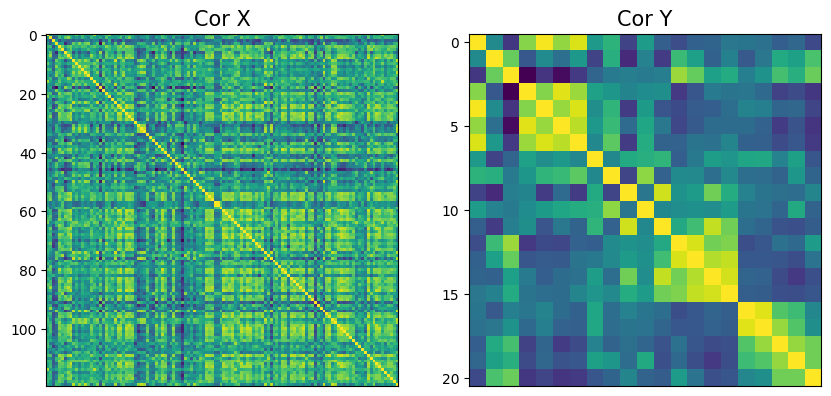

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,10))

ax1.matshow(genes.corr())
ax2.matshow(lipido.corr())
ax1.set_title('Cor X', fontsize=15)
ax2.set_title('Cor Y', fontsize=15)

#borrar eje x 
ax1.axes.get_xaxis().set_visible(False)  
ax2.axes.get_xaxis().set_visible(False) 

plt.show()

` Correlación de las variables entre las muestras`

Se busca la correlación entre las covariables (X[i], Y[j]) -> borrado de las correlaciones de las variables de cada matriz

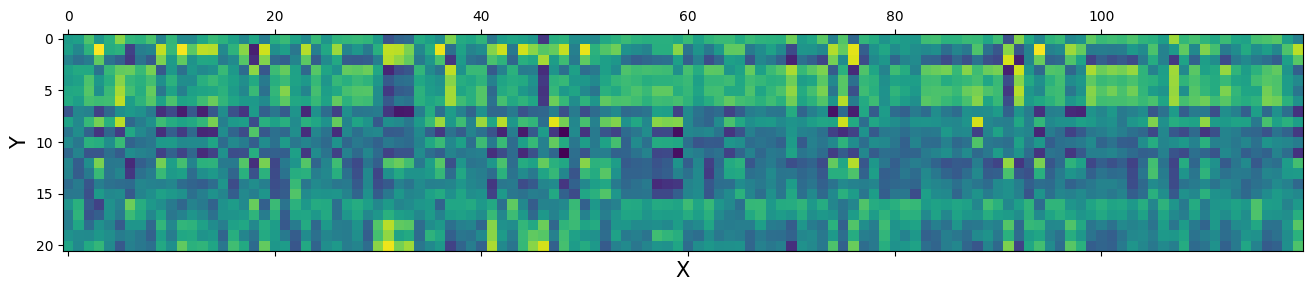

In [4]:
matriz=pd.concat([genes, lipido], axis=1) #matriz conjunta
corr = matriz.corr() #correlación de la matriz conjunta

corr = corr.drop(genes.columns, axis=0) #eliminación de la matriz de correlaciones del df X
corr = corr.drop(lipido.columns, axis=1) #eliminación de la matriz de correlaciones del df Y

# gráfico correlación cruzada
plt.matshow(corr)
plt.xlabel('X', fontsize=15), plt.ylabel('Y', fontsize=15)
plt.show()

## CCAA

In [6]:
cca = CCA(n_components=2, scale=True)
model_cca = cca.fit(genes, lipido)

`Puntuaciones de las variables canónicas`

In [7]:
U, V = model_cca.fit_transform(genes, lipido) #puntuaciones de las matrices U y V

U = pd.DataFrame(U, columns=['x_Dim_1', 'x_Dim_2'])
V = pd.DataFrame(V, columns=['y_Dim_1', 'y_Dim_2'])

Indicar que también se puede alcanzar ese resultado haciendo uso de los métodos del modelo:
- para U: `model_cca.x_scores`
- para V: `model_cca.y_scores_`

Finalmente, se visualizan las puntuaciones:

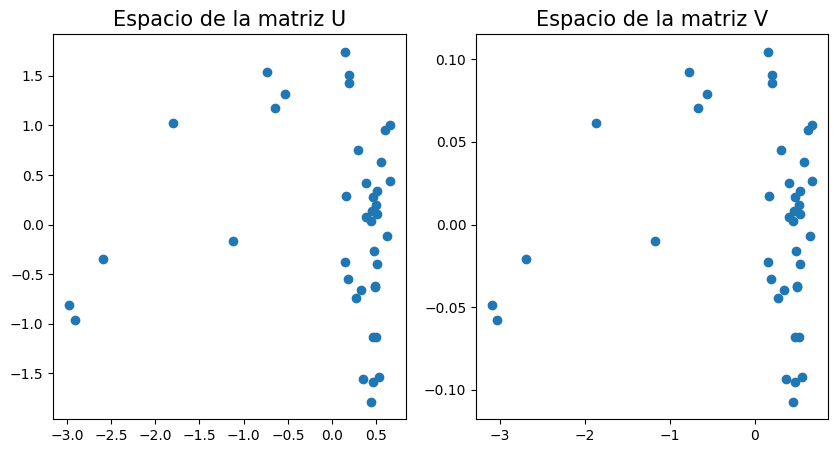

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.scatter(U.x_Dim_1, U.x_Dim_2)
ax2.scatter(V.y_Dim_1, V.y_Dim_2)
ax1.set_title('Espacio de la matriz U', fontsize=15)
ax2.set_title('Espacio de la matriz V', fontsize=15)

plt.show()

`Correlaciones canónicas`

In [10]:
etiqueta = U.columns[0], U.columns[1], V.columns[0], V.columns[1]
etiqueta
result = np.corrcoef(U.T, V.T)
pd.DataFrame(result, columns=etiqueta, index=etiqueta)

,x_Dim_1,x_Dim_2,y_Dim_1,y_Dim_2
x_Dim_1,1.000000e+00,-6.454581e-17,1.000000e+00,1.129707e-14
x_Dim_2,-6.454581e-17,1.000000e+00,-1.245068e-14,1.000000e+00
y_Dim_1,1.000000e+00,-1.245068e-14,1.000000e+00,-1.065596e-15
y_Dim_2,1.129707e-14,1.000000e+00,-1.065596e-15,1.000000e+00
